<a href="https://colab.research.google.com/github/Mjoshi543/ML-LAB-102217262/blob/main/Assignment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Implement the K-Means algorithm for clustering the dataset given at the following
link after omitting the last attribute:

  https://drive.google.com/file/d/1O_NwpJT-8xGfU_-3llUl2sgPu0xllOrX/view?usp=sharing

In [ ]:
from google.colab import files
files.upload()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.model_selection import train_test_split





In [ ]:
df=pd.read_csv('USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


In [ ]:
scaler=MinMaxScaler()
dataFrame_scaled=scaler.fit_transform(df)
dataFrame_scaled=pd.DataFrame(dataFrame_scaled,columns=df.columns)
dataFrame_scaled.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,0.686822,0.441986,0.501502,0.464444,0.329942,0.425210
1,0.683521,0.488538,0.464501,0.242222,0.575968,0.607369
2,0.483737,0.468609,0.701350,0.695556,0.528582,0.425192
3,0.506630,0.660956,0.312430,0.280000,0.491549,0.507384
4,0.469223,0.348556,0.611851,0.495556,0.376988,0.250702


<Axes: xlabel='Area Population', ylabel='Avg. Area Income'>

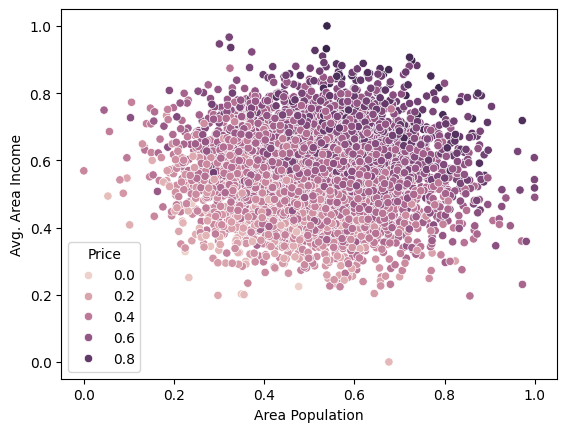

In [ ]:
sns.scatterplot(data = dataFrame_scaled, x = 'Area Population', y = 'Avg. Area Income', hue = 'Price')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataFrame_scaled[['Avg. Area Income',	'Avg. Area House Age',	'Avg. Area Number of Rooms',	'Avg. Area Number of Bedrooms',	'Area Population']], dataFrame_scaled[['Price']], test_size=0.33, random_state=0)

In [ ]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [ ]:
kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

KMeans(n_clusters=3, random_state=0)

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

0.22142977298199173

In [ ]:
K = range(2, 8)
fits = []
score = []


for k in K:
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X_train_norm)


    fits.append(model)


    score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))

<Axes: >

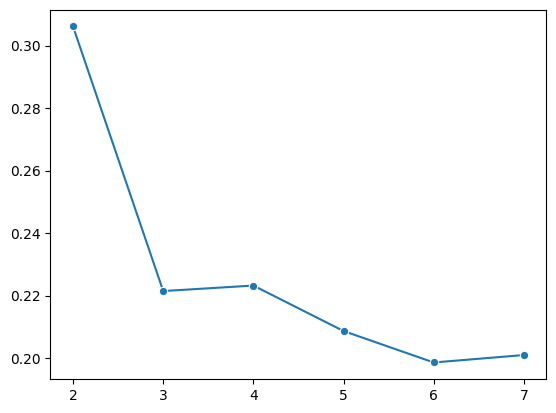

In [ ]:
sns.lineplot(x = K, y = score, marker = 'o')

In [ ]:
kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')

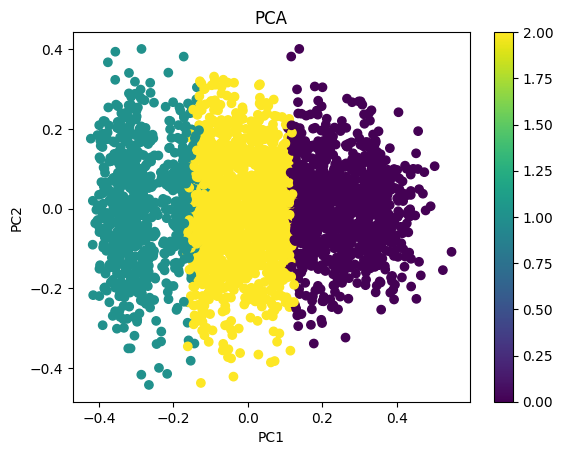

In [ ]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
pca = PCA(n_components = 2)
X_pca=pca.fit_transform(X_train_norm)

y_labels=kmeans.fit_predict(X_train_norm)

plt.scatter(X_pca[:,0],X_pca[:,1],c=y_labels)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA')
plt.colorbar()
plt.show()


2. Implement the K-Medoids algorithm for clustering the dataset given at the above
specified link.

  Note: Converge these algorithms by using SSE. Use elbow method to find the appropriate values of K

In [7]:
pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 16.2 MB/s eta 0:00:00


In [8]:
from google.colab import files
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn_extra.cluster import KMedoids
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [ ]:
df=pd.read_csv('USA_Housing.csv')
df.head()

In [ ]:
scaler=MinMaxScaler()
dataFrame_scaled=scaler.fit_transform(df)
dataFrame_scaled=pd.DataFrame(dataFrame_scaled,columns=df.columns)
dataFrame_scaled.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataFrame_scaled[['Avg. Area Income',	'Avg. Area House Age',	'Avg. Area Number of Rooms',	'Avg. Area Number of Bedrooms',	'Area Population']], dataFrame_scaled[['Price']], test_size=0.33, random_state=0)

In [ ]:
X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [ ]:
kmedoids = KMedoids(n_clusters=3, random_state=42)
labels = kmedoids.fit_predict(X_train_norm)

In [ ]:
silhouette_score(X_train_norm, labels, metric='euclidean')

In [ ]:
K = range(2, 8)
fits = []
score = []


for k in K:
    model = KMedoids(n_clusters = k, random_state = 42).fit(X_train_norm)
    fits.append(model)
    score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))

In [ ]:
sns.lineplot(x = K, y = score, marker = 'o')

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_norm)

kmedoid = KMedoids(n_clusters=3, random_state=42)
y_labels = kmedoid.fit_predict(X_train_norm)

medoid_points = pca.transform(kmedoid.cluster_centers_)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_labels, cmap='viridis', s=10, label='Data Points')
plt.scatter(medoid_points[:, 0], medoid_points[:, 1], c='red', marker='X', s=100, label='Medoids')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA with Medoids')
plt.colorbar(label='Cluster Labels')
plt.legend()
plt.show()